In [1]:
from torchvision import datasets , models
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
# models 
from sklearn import ensemble
from sklearn import gaussian_process
from sklearn import linear_model 
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import discriminant_analysis
from sklearn import model_selection


## Description Of The Vvariables :
- PassengerId : unique identifier
- Survived : <br>
   0 = No  1 = Yes
- Pclass : Ticket class <br>
1 = 1st , Upper
2 = 2nd , Middle 
3 = 3rd , Lower
- Name : full name with a title
- Sex : gender
- Age : Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
- Sibsp: Number of siblings / spouses aboard the Titanic.
- Parch: Number of parents / children aboard the Titanic. 
- Ticket: Ticket number.
- Fare: Passenger fare.
- Cabin: Cabin number.
- Embarked: Port of Embarkation: <br>
  C = Cherbourg <br>
  Q = Queenstown <br>
  S = Southampton <br>
  

In [2]:
# loading data
data_dir = 'Datasets'
train_dir = data_dir + 'train/train.csv'
test_dir = data_dir + 'test/test.csv'
trainloader = torch.utils.data.DataLoader( train_dir , batch_size = 64 , shuffle = True )
testloader = torch.utils.data.DataLoader( test_dir , batch_size = 64 )

In [3]:
train_set = pd.read_csv('Datasets/train/train.csv')
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_set = pd.read_csv('Datasets/test/test.csv')
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age and Fare are countinous numeric values .<br>
Pclass and Survived are integer but categorical variable .<br>


In [6]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
# check data for NA values
train_set_NA = train_set.isna().sum()
test_set_NA = test_set.isna().sum()
print('TRAINING DATASET : \n', train_set_NA)
print('TESTING DATASET : \n', test_set_NA)

TRAINING DATASET : 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
TESTING DATASET : 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [8]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# find the mode to impute null values
train_set['Age'].mode(dropna=True)

0    24.0
dtype: float64

In [10]:
# find the mode to impute null values 
train_set['Cabin'].mode(dropna=True)

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [11]:
# find the mode to impute null values 
train_set['Embarked'].mode(dropna=True)

0    S
dtype: object

In [12]:
# find the mode to impute null values 
test_set['Age'].mode(dropna=True)

0    21.0
1    24.0
dtype: float64

In [13]:
# find the mode to impute null values 
test_set['Cabin'].mode(dropna=True)

0    B57 B59 B63 B66
dtype: object

In [14]:
# find the mode to impute null values 
test_set['Fare'].mode(dropna=True)

0    7.75
dtype: float64

### Dealing with NaN values 
- Age : 177 NaN values <br>
      the mode is 24 
      the mean 29 
      values used to replace NaN (24,29) 
- Cabin : 687 NaN values <br>
        the mode is used to replace NaN values  
        (B96,B98,C23,C25,C27) 
- Embarked : 2 NaN values  <br>
           the mode is (S) which used to replace NaN values 


### For test data 
- Age : 86 NaN values <br>
      the mode is (21 , 24) 
- Cabin : 327 NaN values <br>
      the mode is (B57,B59,B63,B66)
- Fare : 1 NaN value <br>
      the mode is (7.75)

In [15]:
# TRAINING DATASET
mode_values_training_dataset = {'Age':[24,29] , 'Cabin':['B96','B98','C23','C25','C27'], 'Embarked':['S']}

# TESTING DATASET 
mode_values_testing_dataset = {'Age':[21,24] , 'Cabin':['B57','B59','B63','B66'], 'Fare':[7.75] }

In [16]:
train_set['Age'].fillna(pd.Series(np.random.choice(mode_values_training_dataset['Age'],size=len(train_set.index))),inplace=True)


In [17]:
train_set['Cabin'].fillna(pd.Series(np.random.choice(mode_values_training_dataset['Cabin'],size=len(train_set.index))),inplace=True)

In [18]:
train_set['Embarked'].fillna(pd.Series(np.random.choice(mode_values_training_dataset['Embarked'],size=len(train_set.index))),inplace=True)

In [19]:
test_set['Age'].fillna(pd.Series(np.random.choice(mode_values_testing_dataset['Age'],size=len(test_set.index))),inplace=True)
test_set['Cabin'].fillna(pd.Series(np.random.choice(mode_values_testing_dataset['Cabin'],size=len(test_set.index))),inplace=True)

In [20]:
test_set['Fare'].fillna(pd.Series(np.random.choice(mode_values_testing_dataset['Fare'],size=len(test_set.index))),inplace=True)

### Creating Feature Engineering  
Features created here are mentioned in kaggle notebook : [Step 3: Prepare Data For Consumption](https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy#Step-3:-Prepare-Data-for-Consumption)

In [21]:
train_set_cpy = train_set.copy(deep=True)

In [22]:
train_set_cpy.info()
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [23]:
datasets = [train_set_cpy , test_set]

for dataset in datasets :
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 1
    dataset['IsAlone'].loc[dataset['FamilySize']>1] = 0 
    #Age Bins/Buckets using cut or value bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)
    
train_set_cpy.info()
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        891 non-null    object  
 11  Embarked     891 non-null    object  
 12  FamilySize   891 non-null    int64   
 13  IsAlone      891 non-null    int64   
 14  AgeBin       891 non-null    category
dtypes: category(1), float64(2), int64(7), object(5)
memory usage: 98.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (to

/Users/yarasaleh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [24]:

#code categorical data
label = preprocessing.LabelEncoder()
for dataset in datasets :
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Age_Code'] = label.fit_transform(dataset['AgeBin'])

# the y variable aka target 
Target = ['Survived']
# define x variables for feature selection
# for charts
train_set_x = ['Pclass','Sex','Age','SibSp','Parch','Embarked','FamilySize','IsAlone']
# for algorithms calculations  
train_set_calc = ['Pclass','Sex_Code','Age','SibSp','Parch','Embarked_Code','FamilySize','IsAlone'] 
train_x_bins = ['Pclass','Sex_Code','Age_Code','SibSp','Parch','Embarked_Code','FamilySize','IsAlone']

train_set_xy = Target + train_set_x
print('Original X Y: ', train_set_x, '\n')

#define x and y variables for dummy features original
train_set_dummy = pd.get_dummies(train_set_cpy[train_set_x])
train_set_x_dummy = train_set_dummy.columns.tolist()
train_set_xy_dummy = Target + train_set_x_dummy
print('Dummy X Y :',train_set_xy_dummy,'\n')

train_set_dummy.head()

Original X Y:  ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'FamilySize', 'IsAlone'] 

Dummy X Y : ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'] 



,Pclass,Age,SibSp,Parch,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,2,0,0,1,0,0,1
1,1,38.0,1,0,2,0,1,0,1,0,0
2,3,26.0,0,0,1,1,1,0,0,0,1
3,1,35.0,1,0,2,0,1,0,0,0,1
4,3,35.0,0,0,1,1,0,1,0,0,1


In [25]:
train_set_cpy.info()
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    891 non-null    int64   
 1   Survived       891 non-null    int64   
 2   Pclass         891 non-null    int64   
 3   Name           891 non-null    object  
 4   Sex            891 non-null    object  
 5   Age            891 non-null    float64 
 6   SibSp          891 non-null    int64   
 7   Parch          891 non-null    int64   
 8   Ticket         891 non-null    object  
 9   Fare           891 non-null    float64 
 10  Cabin          891 non-null    object  
 11  Embarked       891 non-null    object  
 12  FamilySize     891 non-null    int64   
 13  IsAlone        891 non-null    int64   
 14  AgeBin         891 non-null    category
 15  Sex_Code       891 non-null    int64   
 16  Embarked_Code  891 non-null    int64   
 17  Age_Code       891 non-null    int6

## Splitting training dataset to prevent overfitting (( REMOVE  )) 

In [28]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
x_train , x_test , y_train, y_test = train_test_split(
    train_set_cpy[train_set_calc],
    train_set_cpy[Target],
    random_state=0)

x_train_dummy , x_test_dummy , y_train_dummy, y_test_dummy = train_test_split(
    train_set_dummy[train_set_x_dummy],
    train_set[Target],
    random_state=0)

print("Original Train dataset shape : {}".format(train_set_cpy.shape))
print("Train dataset shape : {}".format(x_train.shape))
print("Test dataset shape : {}".format(x_test.shape))



NameError: name 'train_test_split' is not defined

In [27]:
x_train.head()

NameError: name 'x_train' is not defined

In [45]:
y_train.head()

,Survived
105,0
68,1
253,0
320,0
706,1


In [28]:
train_set.describe(include=np.object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,152,3
top,"Futrelle, Mr. Jacques Heath",male,347082,C23,S
freq,1,577,7,156,646


# Data Analysis

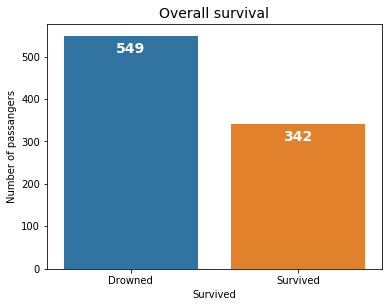

In [26]:
# number of people who survived
plt.figure(figsize=(6,4.5))
ax = sns.countplot(x = 'Survived' , data = train_set_cpy )
plt.xticks(np.arange(2),['Drowned','Survived'])
plt.title('Overall survival' , fontsize=14)
plt.ylabel('Number of passangers')
# calculate passengers for each category
labels = (train_set_cpy["Survived"].value_counts())
for x1 , x2 in enumerate(labels):
    ax.text(x1 , x2-40 , str(x2) , horizontalalignment = 'center' , size = 14 , color = 'w' , fontweight = 'bold')


In [27]:
train_set_cpy["Survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

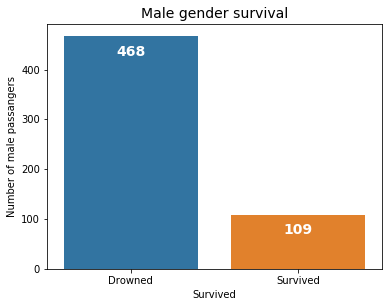

In [28]:
# number of males who survived 
target1 = train_set.loc[(train_set["Sex"] == "male")]
plt.figure(figsize=(6,4.5))
ax = sns.countplot(x = 'Survived' , data = target1 )
plt.xticks(np.arange(2),['Drowned','Survived'])
plt.title('Male gender survival' , fontsize=14)
plt.ylabel('Number of male passangers')
# calculate passengers for each category
labels = (target1["Survived"].value_counts())
for x1 , x2 in enumerate(labels):
    ax.text(x1 , x2-40 , str(x2) , horizontalalignment = 'center' , size = 14 , color = 'w' , fontweight = 'bold')


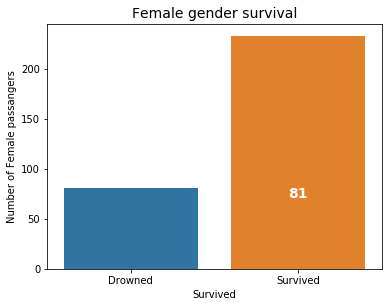

In [29]:
# number of females who survived 
target2 = train_set.loc[(train_set["Sex"] == "female")]
plt.figure(figsize=(6,4.5))
ax = sns.countplot(x = 'Survived' , data = target2 )
plt.xticks(np.arange(2),['Drowned','Survived'])
plt.title('Female gender survival' , fontsize=14)
plt.ylabel('Number of Female passangers')
# calculate passengers for each category
labels = (target2["Survived"].value_counts())
for x1 , x2 in enumerate(labels):
    ax.text(x1 , x2-10 , str(x2) , horizontalalignment = 'center' , size = 14 , color = 'w' , fontweight = 'bold')

Text(0, 0.5, 'Frequency')

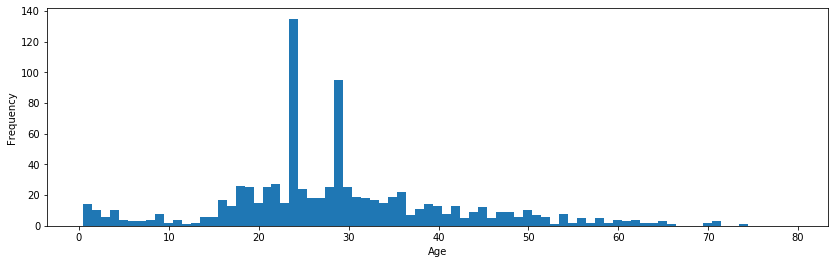

In [30]:
# Age distribuation 
fig , ax = plt.subplots(figsize=(14,4))
ax.hist(x = train_set['Age'], bins = np.arange(train_set['Age'].min() , train_set['Age'].max()) )
ax.yaxis.tick_left()
plt.xlabel('Age')
plt.ylabel('Frequency')

In [31]:
train_set['Age'].describe()

count    891.000000
mean      28.976622
std       13.128797
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

([<matplotlib.axis.YTick at 0x1a2a2e9f50>,
 <a list of 2 Text yticklabel objects>)

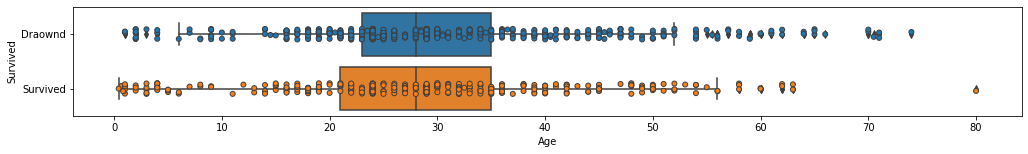

In [32]:
# Surviving by age
plt.subplots(figsize=(17,2))
sns.boxplot(x = 'Age' , y = 'Survived', data = train_set , orient = 'h' )
sns.stripplot(x = 'Age' , y = 'Survived', data = train_set , linewidth = 1, orient = 'h' )
plt.yticks(np.arange(2), ['Draownd','Survived'])


In [33]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
for x in train_set_x :
    print('Survival Correlation by:', x)
    print(train_set_cpy[[x,Target[0]]].groupby(x).mean())
    print('-'*10, '\n')


Survival Correlation by: Pclass
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363
---------- 

Survival Correlation by: Sex
        Survived
Sex             
female  0.742038
male    0.188908
---------- 

Survival Correlation by: Age
       Survived
Age            
0.42        1.0
0.67        1.0
0.75        1.0
0.83        1.0
0.92        1.0
...         ...
70.00       0.0
70.50       0.0
71.00       0.0
74.00       0.0
80.00       1.0

[88 rows x 1 columns]
---------- 

Survival Correlation by: SibSp
       Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000
---------- 

Survival Correlation by: Parch
       Survived
Parch          
0      0.343658
1      0.550847
2      0.500000
3      0.600000
4      0.000000
5      0.200000
6      0.000000
---------- 

Survival Correlation by: Embarked
          Survived
Embarked          
C         0.553571
Q         0.389610
S

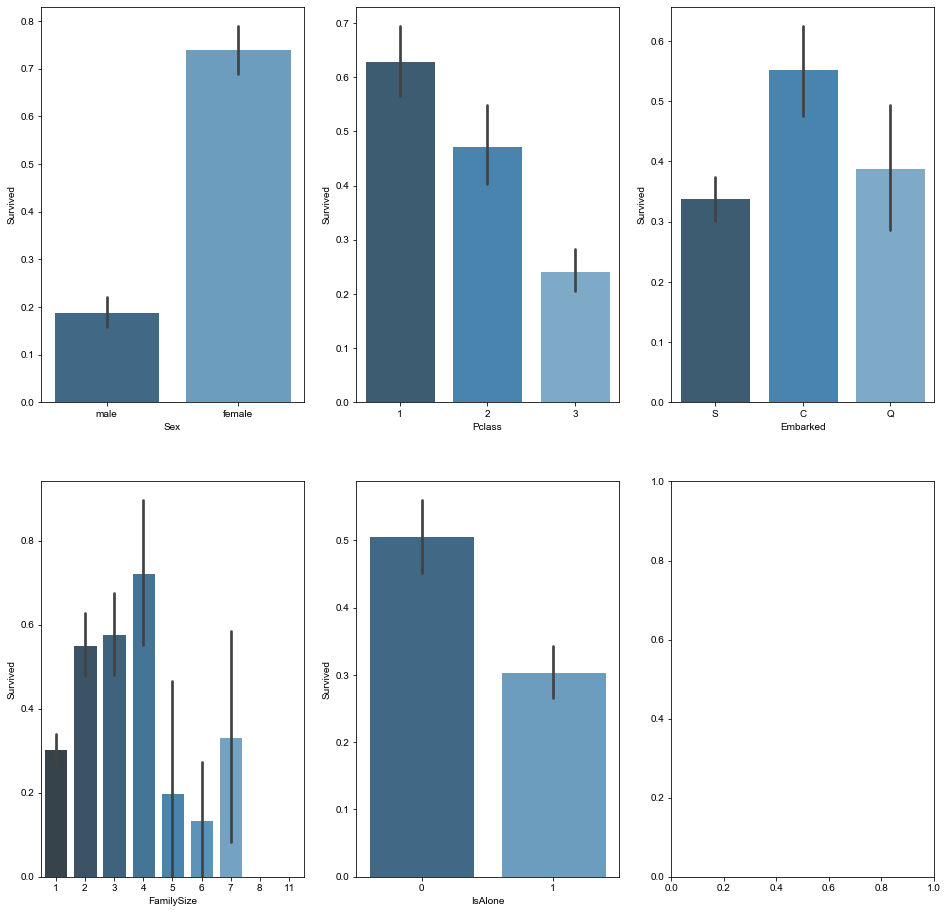

In [34]:
# Seaborn graphics for multi-variables comparison : https://seaborn.pydata.org/api.html
fig , axs = plt.subplots(2,3,figsize=(16,16))
sns.set(style="whitegrid")
sns.barplot(x = 'Sex', y = 'Survived', data = train_set_cpy , ax = axs[0,0] , palette="Blues_d")
sns.barplot(x = 'Pclass', y = 'Survived', data = train_set_cpy , ax = axs[0,1] , palette="Blues_d")
sns.barplot(x = 'Embarked', y = 'Survived', data = train_set_cpy , ax = axs[0,2] , palette="Blues_d")
sns.barplot(x = 'FamilySize', y = 'Survived', data = train_set_cpy , ax = axs[1,0] , palette="Blues_d")
sns.barplot(x = 'IsAlone', y = 'Survived', data = train_set_cpy , ax = axs[1,1] , palette="Blues_d")


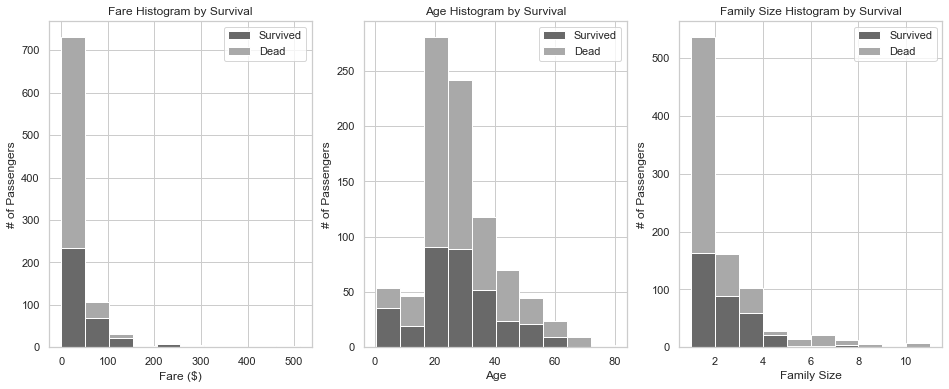

In [35]:
# https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html

plt.figure(figsize=(16,6))





plt.subplot(131)
plt.hist( x = [train_set_cpy[train_set_cpy['Survived'] == 1]['Fare'] ,train_set_cpy [train_set_cpy['Survived'] == 0]['Fare']] ,
        stacked = True ,
        label = ['Survived','Dead'],
        color = ['dimgrey','darkgrey'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()




plt.subplot(132)
plt.hist( x = [train_set_cpy[train_set_cpy['Survived'] == 1]['Age'] ,train_set_cpy [train_set_cpy['Survived'] == 0]['Age']] ,
        stacked = True ,
        label = ['Survived','Dead'],
        color = ['dimgrey','darkgrey'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age')
plt.ylabel('# of Passengers')
plt.legend()




plt.subplot(133)
plt.hist( x = [train_set_cpy[train_set_cpy['Survived'] == 1]['FamilySize'] ,train_set_cpy [train_set_cpy['Survived'] == 0]['FamilySize']] ,
        stacked = True ,
        label = ['Survived','Dead'],
        color = ['dimgrey','darkgrey'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size')
plt.ylabel('# of Passengers')
plt.legend()

Text(0.5, 1.0, 'Sex vs Embarked Survival Comparison')

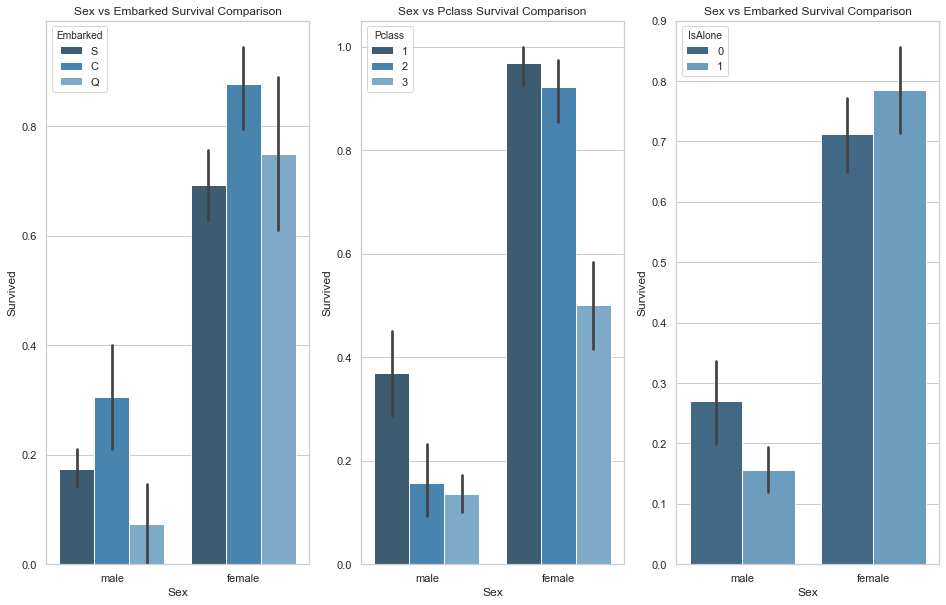

In [36]:
#graph distribution of qualitative data: Sex

# Seaborn graphics for multi-variables comparison : https://seaborn.pydata.org/api.html
fig , axs = plt.subplots(1,3,figsize=(16,10))
sns.set(style="whitegrid")


sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked' , data = train_set_cpy , ax = axs[0] , palette="Blues_d")
axs[0].set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass' , data = train_set_cpy , ax = axs[1] , palette="Blues_d")
axs[1].set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone' , data = train_set_cpy , ax = axs[2] , palette="Blues_d")
axs[2].set_title('Sex vs Embarked Survival Comparison')

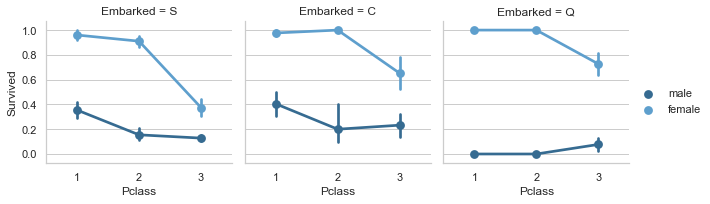

In [37]:
#graph distribution comparing embarked port with sex and survival factor 

#https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
#https://seaborn.pydata.org/generated/seaborn.pointplot.html


fig = g = sns.FacetGrid(train_set_cpy, col="Embarked")
fig.map(sns.pointplot , 'Pclass' , 'Survived', 'Sex', ci = 78 , palette="Blues_d", order = [1,2,3] , hue_order = ['male','female'])
fig.add_legend()

In [38]:
# Machine Learning Algorithm (MLA) to test best preformance
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

MLAs = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability = True),
    svm.NuSVC(probability = True),
    svm.LinearSVC(dual = False),
    
    #Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier()
    
    # THE BELOW MODELS WERE NOT USED DUE TO A WARRING (warnings.warn("Variables are collinear"))
    #Discriminant Analysis
    #discriminant_analysis.LinearDiscriminantAnalysis(),
    #discriminant_analysis.QuadraticDiscriminantAnalysis()
    
    
]

In [39]:
#split dataset in cross-validation  
# To learn more : https://www.notion.so/Journey-To-Machine-Learning-What-I-went-through-and-learned-d5233e619398454097719c4233b003b9#139fc13a38e149d19927a4e1bdef3cd9
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit

# run model 10x with 60/30 split intentionally leaving out 10%

cross_validator_split = model_selection.ShuffleSplit(n_splits = 10,
                                     test_size = .3,
                                     train_size = .6,
                                     random_state = 0 ) 



In [40]:
# table to compare the results of each algorithm 
MLAs_columns = ['MLA Name',
                'MLA Parameters',
                'MLA Train Accuracy Mean', 
                'MLA Test Accuracy Mean', 
                'MLA Time']

MLAs_comparison = pd.DataFrame( columns = MLAs_columns )

# the below table to compare the prediction results 
MLAs_predict = train_set_cpy[Target]



In [41]:
MLAs_predict.info()
MLAs_comparison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   MLA Name                 0 non-null      object
 1   MLA Parameters           0 non-null      object
 2   MLA Train Accuracy Mean  0 non-null      object
 3   MLA Test Accuracy Mean   0 non-null      object
 4   MLA Time                 0 non-null      object
dtypes: object(5)
memory usage: 0.0+ bytes


In [42]:
train_set_cpy[train_x_bins]

,Pclass,Sex_Code,Age_Code,SibSp,Parch,Embarked_Code,FamilySize,IsAlone
0,3,1,1,1,0,2,2,0
1,1,0,2,1,0,0,2,0
2,3,0,1,0,0,2,1,1
3,1,0,2,1,0,2,2,0
4,3,1,2,0,0,2,1,1
...,...,...,...,...,...,...,...,...
886,2,1,1,0,0,2,1,1
887,1,0,1,0,0,2,1,1
888,3,0,1,1,2,2,4,0
889,1,1,1,0,0,0,1,1


In [45]:
# indexing through the MLAs and save thier performance results

# score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate

row_index = 0


for alg in MLAs :
    MLA_Name = alg.__class__.__name__
    MLAs_comparison.loc[row_index, 'MLA Name'] = MLA_Name
    MLAs_comparison.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    
    cv_results = model_selection.cross_validate(alg,
                                                train_set_cpy[train_x_bins],
                                                train_set_cpy[Target].values.ravel(),
                                                cv  = cross_validator_split, 
                                                return_train_score = True)
    
    
    
    MLAs_comparison.loc[row_index,'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLAs_comparison.loc[row_index,'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
    MLAs_comparison.loc[row_index,'MLA Time'] = cv_results['fit_time'].mean()
    
    
    
    # now we run the algorithm and save the result of the predictions 
    alg.fit(train_set_cpy[train_x_bins],train_set_cpy[Target].values.ravel())
    MLAs_predict[MLA_Name] = alg.predict(train_set_cpy[train_x_bins])
    
    
    
    row_index += 1
    
    




In [46]:
MLAs_predict

,Survived,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier,GaussianProcessClassifier,LogisticRegressionCV,PassiveAggressiveClassifier,RidgeClassifierCV,SGDClassifier,Perceptron,BernoulliNB,GaussianNB,KNeighborsClassifier,SVC,NuSVC,LinearSVC,DecisionTreeClassifier,ExtraTreeClassifier
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,0,0,1,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0
3,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
887,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
888,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1,0,0
889,1,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0


In [47]:
MLAs_comparison.sort_values( by = ['MLA Test Accuracy Mean'] , ascending = False, inplace = True )
MLAs_comparison

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Time
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.856554,0.812313,0.0698076
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.824345,0.812313,0.0320378
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.826966,0.81194,0.027084
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.805431,0.802612,0.205658
16,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': False...",0.803558,0.800746,0.00207715
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.874906,0.8,0.108678
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.874906,0.799254,0.138657
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.857303,0.799254,0.0653831
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.871723,0.798134,0.0198353
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.814045,0.798134,0.0738803


In [49]:
for inx in range(1,len(MLAs)) :
    print(MLAs_comparison.loc[inx,'MLA Name']," : \n")
    print(MLAs_comparison.loc[inx,'MLA Parameters'],'\n\n')

BaggingClassifier  : 

{'base_estimator': None, 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False} 


ExtraTreesClassifier  : 

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False} 


GradientBoostingClassifier  : 

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_spli

## Credits 
- [Titanic EDA tutorial with seaborn](https://www.kaggle.com/demidova/titanic-eda-tutorial-with-seaborn#5.-First-look:-variables,-NAs)
- [A Data Science Framework: To Achieve 99% Accuracy](https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy)